In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%precision 4

'%.4f'

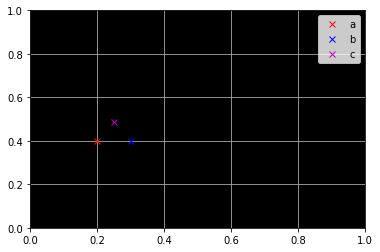

In [64]:
a = np.array([0.2, 0.4])
b = np.array([0.3, 0.4])
c = np.array([0.25, np.sqrt(3)/20+0.4])

fig, ax = plt.subplots(1, 1)
ax.set_facecolor("black")
fig.set_facecolor("white")


ax.plot(a[0], a[1], "rx", label="a")
ax.plot(b[0], b[1], "bx", label="b")
ax.plot(c[0], c[1], "mx", label="c")
ax.legend(loc="best")

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.grid()


plt.show()

In [66]:
data = np.array([a, b, c])
mean = np.mean(data, axis=0)
cov = np.cov(data, rowvar=False)

print(data, "\n", mean, "\n", cov)

[[0.2    0.4   ]
 [0.3    0.4   ]
 [0.25   0.4866]] 
 [0.25   0.4289] 
 [[ 2.500e-03 -3.491e-20]
 [-3.491e-20  2.500e-03]]


/var/folders/r4/b7swffdx35s5wjjm5hj1nbcc0000gn/T/ipykernel_21179/3545588736.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  ax2.contourf(x, y, rv.pdf(pos), label="pdf")


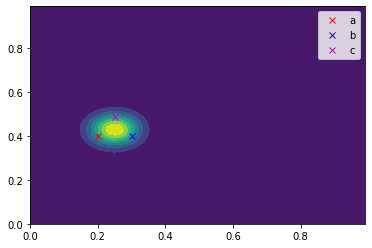

In [67]:
x, y = np.mgrid[0:1:.01, 0:1:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(mean, cov, allow_singular=True)

fig2 = plt.figure()
fig2.set_facecolor("w")

ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos), label="pdf")
ax2.plot(a[0], a[1], "rx", label="a")
ax2.plot(b[0], b[1], "bx", label="b")
ax2.plot(c[0], c[1], "mx", label="c")

ax2.legend()

In [125]:
def rnd_multivariate(numpoints=3):

    # initialize random points
    points = []
    for _ in range(numpoints):
        point = np.array([np.random.normal(0.5, 0.1), np.random.normal(0.5, 0.1)])
        points.append(point)

    # calculate mean vector and covariance matrix
    points_mean = np.mean(points, axis=0)
    points_cov = np.cov(points, rowvar=False)

    # initialize multivariate_normal distribution
    distro = multivariate_normal(points_mean, points_cov, allow_singular=True)

    #visualize points and distro
    x_, y_ = np.mgrid[0:1:.001, 0:1:.001]
    pos_ = np.dstack((x_, y_))
    fig_, ax_ = plt.subplots(1, 1)
    ax_.contourf(x_, y_, distro.pdf(pos_))
    for i in range(numpoints):
        ax_.plot(points[i][0], points[i][1], "rx")

    ax.set_ylim(np.min(points[:][1]), np.max(points[:][1]))
    ax.set_xlim(np.min(points[:][0]), np.max(points[:][0]))
    plt.show()

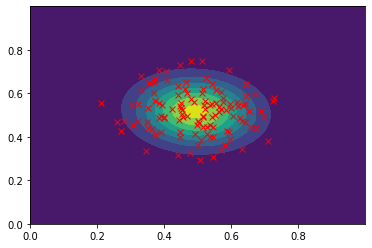

In [126]:
rnd_multivariate(120)